# Final analysis - supervised learning

In this notebook I am going to conduct the final analysis. The aim of this project is to predict survival at 2 years after diagnosis of colon cancer. Therefore, I am going to try different machine learning models in order to predict survival.

Firstly, I am going to install the dependencies that are needed and then I am going to open the pickle file that I had saved previously, which contains all the tables.

In [1]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import matplotlib.ticker as mtick
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import roc_curve, auc
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LogNorm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# ! pip install xgboost
# import xgboost as xgb
# from xgboost import XGBClassifier
! pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
! pip install lifelines
from lifelines import CoxPHFitter

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [3]:
df = pd.read_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
7,10001901,M,NaN,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,62.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1.325147,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,10002351,F,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,63.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.158135,29.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I am going check again the characteristics of the data frame, including the shape of the table, the missing data, the type of variables I have and other basic information about the data frame. 

In [4]:
df.shape

(33690, 83)

In [5]:
df.isna().sum()

PATIENTID                       0
SEX                             0
ETHNICITY                    1960
NUMBER_TUMOURS                  0
C180                            0
C181                            0
C182                            0
C183                            0
C184                            0
C185                            0
C186                            0
C187                            0
C188                            0
BEH_BENIGN                      0
BEH_MALIG                       0
BEH_MICINV                      0
BEH_INSITU                      0
BEH_UNCERT                      0
BEH_MALIG_METAS                 0
BEH_MALIG_UNCERT                0
Tis                             0
T0                              0
T1                              0
T2                              0
T3                              0
T4                              0
N0                              0
N1                              0
N2                              0
N3            

In [6]:
df.dtypes

PATIENTID                       int64
SEX                          category
ETHNICITY                    category
NUMBER_TUMOURS                  int64
C180                            int64
C181                            int64
C182                            int64
C183                            int64
C184                            int64
C185                            int64
C186                            int64
C187                            int64
C188                            int64
BEH_BENIGN                      int64
BEH_MALIG                       int64
BEH_MICINV                      int64
BEH_INSITU                      int64
BEH_UNCERT                      int64
BEH_MALIG_METAS                 int64
BEH_MALIG_UNCERT                int64
Tis                             int64
T0                              int64
T1                              int64
T2                              int64
T3                              int64
T4                              int64
N0          

The variable "SEX" will be reclassified, so that "male" will have the value 1 and "female" will have the value 0. 

In [7]:
df['SEX'].value_counts()

M    17269
F    16421
Name: SEX, dtype: int64

In [8]:
def sex(value):
    if value == 'M':
        return 1
    else:
        return 0

df['SEX'] = df['SEX'].apply(sex)
df['SEX'] = df['SEX'].astype(int)
df['SEX'].value_counts()

1    17269
0    16421
Name: SEX, dtype: int64

In [9]:
df['CANCER_YEARS_MEDIAN'].describe()

count    33690.000000
mean         2.077229
std          1.117319
min          0.000000
25%          1.251224
50%          2.072596
75%          3.005537
max          4.043889
Name: CANCER_YEARS_MEDIAN, dtype: float64

In order to predict survival at 2 years, I am going to select those patients who have died in the first 2 years, and those patients who are alive and have a follow-up time of at least 2 years.

In [10]:
horizon = 2

In [11]:
df = df[((df['DEAD'] == 1) & (df['CANCER_YEARS_MEDIAN'] <= horizon)) | 
        ((df['DEAD']== 0) & (df['CANCER_YEARS_MEDIAN'] >= horizon))]
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,0,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.857711,120.0,472.5,20.910494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10001128,0,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2.234132,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,0,NaN,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,77.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,3.022649,0.0,596.5,33.930521,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
9,10002391,1,White British,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.083547,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,10002619,1,White British,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,86.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.089023,0.0,175.0,26.218821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape

(24349, 83)

In [13]:
df['DEAD'].value_counts()

0    16674
1     7675
Name: DEAD, dtype: int64

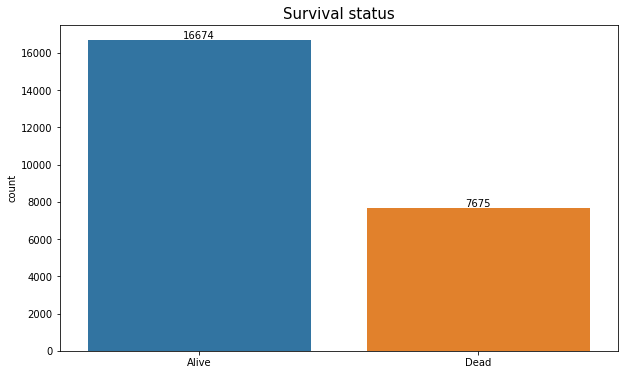

In [14]:
ax = sns.countplot(data=df, x='DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Survival status', fontsize=15)
ax.set_xlabel('')
plt.gcf().set_size_inches(10,6)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 100, height, ha='center')

In [188]:
percentage_alive = np.mean(df['DEAD'] == 0) 
percentage_dead = np.mean(df['DEAD'] == 1) 
print(f'Percentage of patients classified as alive: {percentage_alive:.2%}')
print(f'Percentage of patients classified as dead: {percentage_dead:.2%}')

Percentage of patients classified as alive: 68.48%
Percentage of patients classified as dead: 31.52%


As we can see above, 16674 (68.48%) patients are alive and 7675 (31.52%) are dead at 2 years.

In [205]:
new_memory = df.memory_usage(deep = True).sum() / 1024 ** 2 
print(f'Memory used: {new_memory:.1f} MB')

Memory used: 16.30 MB


In [17]:
df.columns

Index(['PATIENTID', 'SEX', 'ETHNICITY', 'NUMBER_TUMOURS', 'C180', 'C181',
       'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT',
       'BEH_MALIG_METAS', 'BEH_MALIG_UNCERT', 'Tis', 'T0', 'T1', 'T2', 'T3',
       'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2',
       'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4',
       'AGE_MEDIAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201',
       'L0301', 'L0901', 'CURATIVE_TREAT', 'NON_CURATIVE_TREAT',
       'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'DEPR1',
       'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_YEARS_MEDIAN',
       'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI',
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2',
       'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2',

Now I am going to create dummy variables for the variable "ETHNICITY", so that it can be included in the machine learning models.

In [18]:
df = pd.concat([df[['PATIENTID', 'NUMBER_TUMOURS', 'BMI', 'CANCER_YEARS_MEDIAN', 'AGE_MEDIAN',
       'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'SEX', 
       'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'BEH_MALIG_METAS', 'BEH_MALIG_UNCERT',
       'Tis', 'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 
       'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901',
       'CURATIVE_TREAT', 'NON_CURATIVE_TREAT', 'NO_ACTIVE_TREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',        
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2',
       'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2',
       'OTHER2', 'DEAD']],                      
        pd.get_dummies(df['ETHNICITY'], prefix='ETHNICITY')
        ], axis=1)
df.head()

,PATIENTID,NUMBER_TUMOURS,BMI,CANCER_YEARS_MEDIAN,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
0,10001000,1,20.910494,3.857711,79.0,120.0,472.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10001128,1,26.218821,2.234132,86.0,0.0,175.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10001482,1,33.930521,3.022649,77.0,0.0,596.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10002391,1,26.218821,2.083547,40.0,0.0,175.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,10002619,1,26.218821,2.089023,86.0,0.0,175.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
df.isna().sum()

PATIENTID                                  0
NUMBER_TUMOURS                             0
BMI                                        0
CANCER_YEARS_MEDIAN                        0
AGE_MEDIAN                                 0
DIAG_TO_SURG_DAYS_MEDIAN                   0
DIAG_TO_TREAT_DAYS_MEDIAN                  0
SEX                                        0
C180                                       0
C181                                       0
C182                                       0
C183                                       0
C184                                       0
C185                                       0
C186                                       0
C187                                       0
C188                                       0
BEH_BENIGN                                 0
BEH_MALIG                                  0
BEH_MICINV                                 0
BEH_INSITU                                 0
BEH_UNCERT                                 0
BEH_MALIG_

As we can see above, after creating the dummy variables, none of the variables has missing data.

In [20]:
df.shape

(24349, 100)

Now I am going to delete the variables "PATIENTID" and "CANCER_YEARS_MEDIAN" since these variables will not be needed for the rest of the analysis, and I am also going to split the dataset into "X" and "y". The variable that I want to predict ("DEAD") will be included in "y". 

In [21]:
X = df.drop(columns=['PATIENTID', 'DEAD', 'CANCER_YEARS_MEDIAN'])

In [22]:
y = df['DEAD']

In [23]:
X.shape

(24349, 97)

In [24]:
X.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
0,1,20.910494,79.0,120.0,472.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,26.218821,86.0,0.0,175.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,33.930521,77.0,0.0,596.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,26.218821,40.0,0.0,175.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,1,26.218821,86.0,0.0,175.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
X.dtypes

NUMBER_TUMOURS                               int64
BMI                                        float64
AGE_MEDIAN                                 float64
DIAG_TO_SURG_DAYS_MEDIAN                   float64
DIAG_TO_TREAT_DAYS_MEDIAN                  float64
SEX                                          int64
C180                                         int64
C181                                         int64
C182                                         int64
C183                                         int64
C184                                         int64
C185                                         int64
C186                                         int64
C187                                         int64
C188                                         int64
BEH_BENIGN                                   int64
BEH_MALIG                                    int64
BEH_MICINV                                   int64
BEH_INSITU                                   int64
BEH_UNCERT                     

Firstly, I am going to check if I have issues of collinearity using the variance inflation factor (VIF).

In [26]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [27]:
calc_vif(X).sort_values(by='VIF')

,Feature,VIF
69,STAGING,1.002271
21,BEH_MALIG_UNCERT,1.002861
87,ETHNICITY_Other,1.003091
20,BEH_MALIG_METAS,1.003583
93,ETHNICITY_White,1.005215
85,ETHNICITY_Mixed white and Asian,1.012798
23,T0,1.013283
41,GRADE4,1.015067
86,ETHNICITY_Mixed white and black African,1.015242
68,DISEASE_MOD,1.017086


In [28]:
calc_vif(X[['AGE_MEDIAN','BMI']])

,Feature,VIF
0,AGE_MEDIAN,24.112702
1,BMI,24.112702


In [29]:
calc_vif(X[['STAGE0','STAGE1','STAGE2','STAGE3','STAGE4','M1']])

,Feature,VIF
0,STAGE0,1.000000
1,STAGE1,1.000404
2,STAGE2,1.000140
3,STAGE3,1.000260
4,STAGE4,25.494654
5,M1,25.496624


In [30]:
calc_vif(X[['STAGE4','M1']])

,Feature,VIF
0,STAGE4,25.489036
1,M1,25.489036


Some issues of collinearity were observed between "AGE_MEDIAN" and "BMI". However, I decided not to remove any of these variables, since according to the knowledge I have of this area, age and BMI are confounders which are typically included in the models, as well as the sex of the patient. 

Similarly, some issues of collinearity were also observed between "STAGE4" and "M1". However, I also decided not to remove these variables, since according to the information I read in the file "CPRD Cancer Registration Dictionary Set 17 up to 2016 v8.1", "STAGE" is a combination of the T, N and M variables, but it is not guaranteed that data from the individual T, N and M variables have been combined into the variable "STAGE", so they should be used in parallel. Thus, I decided to keep both "STAGE4 and "M1" for the moment. 

After checking collinearity issues, I am going to normalize the numerical variables.

In [31]:
X_normalized = X.copy()
X_normalized['DIAG_TO_SURG_DAYS_MEDIAN'] = preprocessing.normalize(X['DIAG_TO_SURG_DAYS_MEDIAN'].values.reshape(-1, 1))
X_normalized['DIAG_TO_TREAT_DAYS_MEDIAN'] = preprocessing.normalize(X['DIAG_TO_TREAT_DAYS_MEDIAN'].values.reshape(-1, 1))
X_normalized['NUMBER_TUMOURS'] = preprocessing.normalize(X['NUMBER_TUMOURS'].values.reshape(-1, 1))
X_normalized['BMI'] = preprocessing.normalize(X['BMI'].values.reshape(-1, 1))
X_normalized['AGE_MEDIAN'] = preprocessing.normalize(X['AGE_MEDIAN'].values.reshape(-1, 1))

Now I am going to split the dataset into a dataset for training and a dataset for testing. I am going to set the option "random_state=0" in order to obtain always the same results.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state=0)

In [33]:
y_train.value_counts()

0    13333
1     6146
Name: DEAD, dtype: int64

In [34]:
y_test.value_counts()

0    3341
1    1529
Name: DEAD, dtype: int64

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [36]:
# y.value_counts(normalize=True)

In [37]:
# y_train.value_counts(normalize=True)

In [38]:
# y_test.value_counts(normalize=True)

Now I am going to start building the machine learning models to predict survival. Firstly, I will create a logistic regression classifier since it is a simple and fast model that will serve as baseline.

Since the outcome is quite imbalanced (68.48% of patients are alive and 31.52% are dead), I am going to include the option class_weight='balanced' so that the algorithm automatically adjust weights inversely proportionally to class frequencies. Additionally, I am going to evaluate the model performance using the metric "recall" mainly, since this metric is appropriate for imbalanced datasets. I am also going to look at "precision" and "F1-score", since I consider that these metrics are important as well. However, I have decided to prioritise the metric "recall" since I consider that in this case it is more important to minimise the false negatives that to minimise the false positives. I am also going to use cross-validation in order to obtain better estimations of the scores.

In [39]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=3000) 

In [40]:
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
cv = 3
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In order to improve recall metric of the models, I am going to look for the best hyperparameters using GridSearchCV.

In [42]:
logr_grid = GridSearchCV(LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=3000), 
                         param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                         cv=5, scoring='recall') 

In [43]:
logr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=3000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [237]:
print(f'Best recall: {logr_grid.best_score_:.1%}') 
print(f'Best parameters: {logr_grid.best_params_:}') 

Best recall: 80.4%
Best parameters: {'C': 0.1}


In [45]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=3000, C=0.1) 

In [46]:
logr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
cv = 10
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 62.0%
F1-score: 70.5%


This model was built using all the variables I have, so now I am going to try to simplify the model. I am going to select those variables that are more important for the model, and those variables that are less relevant will be removed following a backward stepwise selection process.

The weights of each feature is held in the coef_ attribute. Thus, I am going to check these weights and plot them in order to have a better idea of the variables that are less relevant for the model.

In [48]:
logr.coef_

array([[ 1.79012781e-03,  1.79012781e-03, -1.29704379e-02,
        -7.60924277e-01,  2.49637487e-02, -3.92443611e-02,
         2.50358051e-01, -1.78668720e-02,  2.63640303e-01,
         4.60191673e-01,  2.48332689e-01,  3.30653387e-01,
         1.22940178e-01,  2.96221226e-01,  7.84425099e-02,
        -1.14096552e-01,  3.79411099e-01, -4.88944996e-02,
        -3.65804488e-01,  2.04189075e-01, -6.79077277e-02,
         5.96949514e-02, -3.11354938e-01, -6.99462503e-02,
        -2.40697122e-01, -2.76158163e-01, -5.71447386e-02,
         1.65914773e-02, -1.64621926e-01, -4.86416313e-02,
        -7.57104729e-02, -2.04671679e-01,  4.47815225e-01,
        -3.12379617e-01, -1.98487017e+00, -1.70644528e+00,
        -1.06880401e+00,  4.54975276e-01, -2.41198956e+00,
        -2.02587110e+00, -1.06362630e+00, -9.15252813e-02,
        -8.90718359e-02,  3.40945637e-02,  1.23880966e-02,
         6.81054603e-02, -8.39955972e-02,  6.45881662e-02,
         5.94000957e-02, -7.42315974e-02,  7.09334040e-0

In [49]:
def plot_logistic_regression_coefficients(model, df):    
    x = np.arange(len(df.columns))    
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.bar(x, np.absolute(model.coef_.ravel()))    
    ax.set_xticks(x)    
    ax.set_xticklabels(df.columns, rotation=90)    
    ax.set_title('Absolute values of the logistic regression model coefficients')    
    return fig, ax

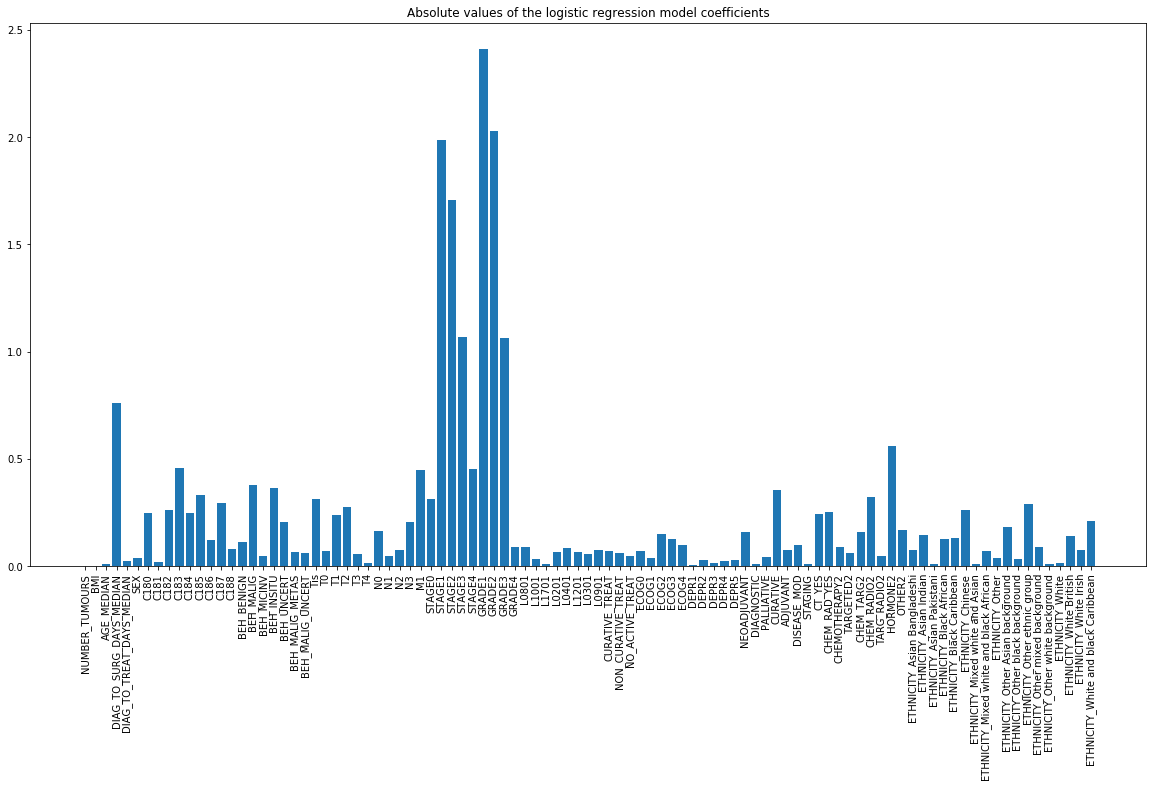

In [50]:
_ = plot_logistic_regression_coefficients(logr, X_train)

In [51]:
# _ = plot_logistic_regression_coefficients(logr, X_train2)

In [52]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
X_train2 = X_train.drop(columns=['L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901'])

In [54]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [56]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
X_train2 = X_train.drop(columns=['L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5'])

In [58]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [215]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [60]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT'])

In [62]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [64]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN'])

In [66]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [68]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4'])

In [70]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [72]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [73]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING'])

In [74]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [76]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [77]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean'])

In [78]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [80]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [81]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                                'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                                'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT'])

In [82]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [221]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [84]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [85]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                                'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                                'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT',
                                'CT_YES'])

In [86]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [222]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [88]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [89]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                                'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                                'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT',
                                'CT_YES','CHEM_RAD_YES'])

In [90]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [92]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [93]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                                'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                                'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT',
                                'CT_YES','CHEM_RAD_YES',
                                'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2'
                                ])

In [94]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [224]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [96]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                                'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                                'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT',
                                'CT_YES','CHEM_RAD_YES',
                                'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2',
                                'N0','N1','N2','N3'])

In [98]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [100]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [101]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                                'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                                'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT',
                                'CT_YES','CHEM_RAD_YES',
                                'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2',
                                'N0','N1','N2','N3',
                                'Tis','T0','T1','T2','T3','T4'])

In [102]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [104]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [105]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                                'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                                'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT',
                                'CT_YES','CHEM_RAD_YES',
                                'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2',
                                'N0','N1','N2','N3',
                                'Tis','T0','T1','T2','T3','T4',
                                'M1'])

In [106]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


In [108]:
X_train.head()

,NUMBER_TUMOURS,BMI,AGE_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,SEX,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,BEH_MALIG_METAS,BEH_MALIG_UNCERT,Tis,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NON_CURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean
26591,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15555,1.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10950,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
41078,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21097,1.0,1.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [109]:
X_train2 = X_train.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                                'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                                'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                                'DIAG_TO_TREAT_DAYS_MEDIAN',
                                'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                                'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                                'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                                'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                                'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                                'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                                'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                                'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                                'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                                'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                                'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT',
                                'CT_YES','CHEM_RAD_YES',
                                'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2',
                                'N0','N1','N2','N3',
                                'Tis','T0','T1','T2','T3','T4',
                                'M1',
                                'C180','C181','C182','C183','C184','C185','C186','C187','C188'])

In [110]:
logr.fit(X_train2, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
cv = 3
recall_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train2, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 61.9%
F1-score: 70.4%


These are the variables that will be retained in the model. As we can see, the recall has increased from 0.804 before the variable selection to 0.816, and the precision has not decreased significantly (from 0.628 to 0.619). The F1-score is very similar (from 0.705 to 0.704).

In [112]:
X_train2.shape

(19479, 14)

In [113]:
X_train = X_train2.copy()

In [114]:
X_train.shape

(19479, 14)

In [115]:
X_test = X_test.drop(columns=['L0801','L1001','L1701','L0201','L0401','L1201','L0301','L0901',
                              'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
                              'CURATIVE_TREAT','NON_CURATIVE_TREAT','NO_ACTIVE_TREAT',
                              'DIAG_TO_TREAT_DAYS_MEDIAN',
                              'ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
                              'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING',
                              'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian','ETHNICITY_Asian Pakistani', 
                              'ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
                              'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African', 
                              'ETHNICITY_Other','ETHNICITY_Other Asian background','ETHNICITY_Other black background',
                              'ETHNICITY_Other ethnic group','ETHNICITY_Other mixed background',
                              'ETHNICITY_Other white background','ETHNICITY_White','ETHNICITY_White British', 
                              'ETHNICITY_White Irish','ETHNICITY_White and black Caribbean',
                              'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU',
                              'BEH_UNCERT','BEH_MALIG_METAS','BEH_MALIG_UNCERT',
                              'CT_YES','CHEM_RAD_YES',
                              'CHEMOTHERAPY2','TARGETED2','CHEM_TARG2','CHEM_RADIO2','TARG_RADIO2','HORMONE2','OTHER2',
                              'N0','N1','N2','N3',
                              'Tis','T0','T1','T2','T3','T4',
                              'M1',
                              'C180','C181','C182','C183','C184','C185','C186','C187','C188'])

In [116]:
X_test.shape

(4870, 14)

Now I am going to evaluate again the logistic regression classifier, using only the variables that I have selected.

In [117]:
logr_grid = GridSearchCV(LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=5000), 
                         param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                         cv=10, scoring='recall') 

In [118]:
logr_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [119]:
print(f'Best recall: {logr_grid.best_score_:.1%}') 
print(f'Best parameters: {logr_grid.best_params_:}') 

Best F1-score: 0.816
Best parameters: {'C': 0.1}


In [120]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=5000, C=0.1) 

In [121]:
logr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [229]:
cv = 10
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 81.6%
Precision: 62.0%
F1-score: 70.5%


Once the model is trained, it will be evaluated using the test data.

In [230]:
cv = 10
recall_logr = cross_val_score(logr, X_test, y_test, cv=cv, scoring='recall').mean()
precision_logr = cross_val_score(logr, X_test, y_test, cv=cv, scoring='precision').mean()
f1_logr = cross_val_score(logr, X_test, y_test, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_logr:.1%}')
print(f'Precision: {precision_logr:.1%}')
print(f'F1-score: {f1_logr:.1%}')

Recall: 83.3%
Precision: 62.1%
F1-score: 71.1%


This logistic regression classifier has a recall of 83.3%. I am also going to check the false positives and the false negatives, as well as plotting the confusion matrix.

In [124]:
y_predicted = logr.predict(X_test)

In [240]:
logr_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(logr_confusion_matrix)

[[1303  226]
 [ 823 2518]]


In [243]:
true_positives, false_negatives, false_positives, true_negatives = logr_confusion_matrix.ravel()
print(f'True positives: {true_positives:}')
print(f'True negatives: {true_negatives:}')
print(f'False positives: {false_positives:}')
print(f'False negatives: {false_negatives:}') 

True positives: 1303
True negatives: 2518
False positives: 823
False negatives: 226


In [127]:
def plot_confusion_matrix(logr_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(logr_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

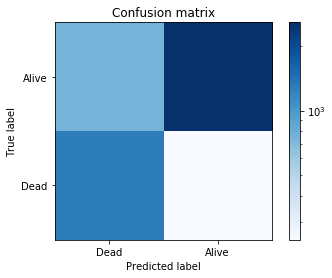

In [128]:
_ = plot_confusion_matrix(logr_confusion_matrix)

In [129]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.91      0.77      0.84      3341
        Dead       0.63      0.84      0.72      1529

    accuracy                           0.79      4870
   macro avg       0.77      0.81      0.78      4870
weighted avg       0.82      0.79      0.80      4870



Additionally, I am going to plot the precision-recall curve, which summarises the trade-off between the true positive rate and the positive predictive value, and to obtain the average precision score, which are appropriate for imbalanced datasets.

Average precision-recall score: 0.76


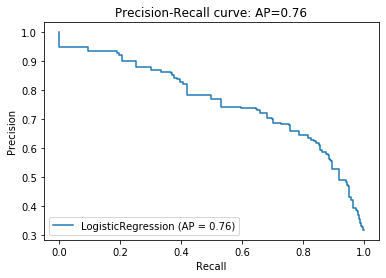

In [130]:
y_predicted_proba_logr = logr.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_logr[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(logr, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

This logistic regression classifier will be the baseline model. The next step will be to evaluate other models to see if I can find a better model than this logistic regression classifier.

# Decision Tree

In [131]:
clfTree = DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [132]:
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [231]:
cv = 5
recall_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='recall').mean()
precision_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='precision').mean()
f1_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_clfTree:.1%}')
print(f'Precision: {precision_clfTree:.1%}')
print(f'F1-score: {f1_clfTree:.1%}')

NameError: name 'clfTree' is not defined

In [134]:
clfTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced', random_state=0),
                       param_grid = {'max_depth': np.arange(1,40,5),
                                     'min_samples_leaf': np.arange(1,40,5),
                                     'min_samples_split': np.arange(2,40,5),
                                     'max_features': ['auto','sqrt']
                                    },                                    
                       cv = 5,
                       scoring = 'recall'
                       )

In [135]:
clfTree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36

In [136]:
print(f'Best recall: {clfTree_grid.best_score_:.1%}') 
print(f'Best parameters: {clfTree_grid.best_params_:}') 

Best F1-score: 0.812
Best parameters: {'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7}


In [137]:
clfTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced', random_state=0),
                       param_grid = {'max_depth': np.arange(9,14),
                                     'min_samples_leaf': np.arange(1,4),
                                     'min_samples_split': np.arange(5,10),
                                     'max_features': ['auto','sqrt']
                                    },                                    
                       cv = 10,
                       scoring = 'recall'
                       )

In [138]:
clfTree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 9, 10, 11, 12, 13]),
       

In [139]:
print(f'Best recall: {clfTree_grid.best_score_:.1%}') 
print(f'Best parameters: {clfTree_grid.best_params_:}') 

Best F1-score: 0.826
Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6}


In [140]:
clfTree = DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth=10, max_features='auto',
                                min_samples_leaf=2, min_samples_split=6)

In [141]:
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [142]:
cv = 10
recall_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='recall').mean()
precision_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='precision').mean()
f1_clfTree = cross_val_score(clfTree, X_train, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_clfTree:.1%}')
print(f'Precision: {precision_clfTree:.1%}')
print(f'F1-score: {f1_clfTree:.1%}')

Recall: 0.826
Precision: 0.593
F1-score: 0.690


Once the model is trained, it will be evaluated using the test data.

In [143]:
cv = 10
recall_clfTree = cross_val_score(clfTree, X_test, y_test, cv=cv, scoring='recall').mean()
precision_clfTree = cross_val_score(clfTree, X_test, y_test, cv=cv, scoring='precision').mean()
f1_clfTree = cross_val_score(clfTree, X_test, y_test, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_clfTree:.1%}')
print(f'Precision: {precision_clfTree:.1%}')
print(f'F1-score: {f1_clfTree:.1%}')

Recall: 0.786
Precision: 0.637
F1-score: 0.697


This decision tree classifier has a recall of 78.6%, lower than the recall of 83.3% for the logistic regression classifier. I am also going to check the false positives and the false negatives, as well as plotting the confusion matrix.

In [144]:
y_predicted = clfTree.predict(X_test)

In [145]:
clfTree_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfTree_confusion_matrix)

[[1293  236]
 [ 861 2480]]


In [146]:
true_positives, false_negatives, false_positives, true_negatives = clfTree_confusion_matrix.ravel()
print(f'True positives: {true_positives:}')
print(f'True negatives: {true_negatives:}')
print(f'False positives: {false_positives:}')
print(f'False negatives: {false_negatives:}') 

True positives: 1293
True negatives: 2480
False positives: 861
False negatives: 236


In [147]:
def plot_confusion_matrix(clfTree_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfTree_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

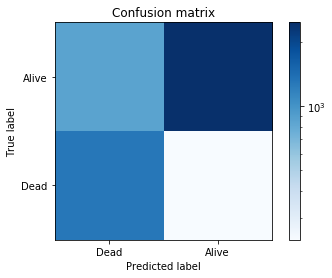

In [148]:
_ = plot_confusion_matrix(clfTree_confusion_matrix)

In [149]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.91      0.74      0.82      3341
        Dead       0.60      0.85      0.70      1529

    accuracy                           0.77      4870
   macro avg       0.76      0.79      0.76      4870
weighted avg       0.81      0.77      0.78      4870



Additionally, I am going to plot the precision-recall curve and to obtain the average precision score.

Average precision-recall score: 0.74


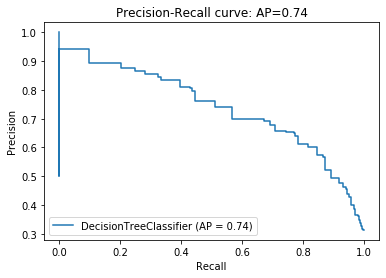

In [150]:
y_predicted_proba_clfTree = clfTree.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfTree[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfTree, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

# Random Forest

In [151]:
clfRF = RandomForestClassifier(class_weight='balanced', random_state=0)

In [152]:
clfRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [153]:
cv = 3
recall_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='recall').mean()
precision_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='precision').mean()
f1_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_RF:.1%}')
print(f'Precision: {precision_RF:.1%}')
print(f'F1-score: {f1_RF:.1%}')

Recall: 0.814
Precision: 0.623
F1-score: 0.706


In [165]:
RF_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=0, n_estimators=500),
                       param_grid = {'max_depth': np.arange(5,15,3),
                                     'min_samples_leaf': np.arange(1,15,3),
                                     'min_samples_split': np.arange(5,25,5),
                                     'max_features': ['auto','sqrt']
                                    },
                       cv = 5,
                       scoring = 'recall')

In [166]:
RF_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=0,
                             

In [167]:
print(f'Best recall: {RF_grid.best_score_:.1%}') 
print(f'Best parameters: {RF_grid.best_params_:}') 

Best F1-score: 0.821
Best parameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [170]:
RF_grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=0, n_estimators=500),
                       param_grid = {'max_depth': np.arange(7,10),
                                     'min_samples_leaf': np.arange(1,3),
                                     'min_samples_split': np.arange(2,8)                                     
                                    },
                       cv = 5,
                       scoring = 'recall')

In [171]:
RF_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=0,
                             

In [172]:
print(f'Best recall: {RF_grid.best_score_:.1%}') 
print(f'Best parameters: {RF_grid.best_params_:}') 

Best F1-score: 0.829
Best parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [173]:
clfRF = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=9, 
                               min_samples_leaf=1, min_samples_split=3, n_estimators=500)

In [174]:
clfRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [175]:
cv = 10
recall_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='recall').mean()
precision_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='precision').mean()
f1_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_RF:.1%}')
print(f'Precision: {precision_RF:.1%}')
print(f'F1-score: {f1_RF:.1%}')

Recall: 0.827
Precision: 0.614
F1-score: 0.704


Once the model is trained, it will be evaluated using the test data.

In [177]:
cv = 10
recall_RF = cross_val_score(clfRF, X_test, y_test, cv=cv, scoring='recall').mean()
precision_RF = cross_val_score(clfRF, X_test, y_test, cv=cv, scoring='precision').mean()
f1_RF = cross_val_score(clfRF, X_test, y_test, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_RF:.1%}')
print(f'Precision: {precision_RF:.1%}')
print(f'F1-score: {f1_RF:.1%}')

Recall: 0.821
Precision: 0.627
F1-score: 0.710


This random forest classifier has a recall of 82.1%, lower than the recall of 83.3% for the logistic regression classifier. I am also going to check the false positives and the false negatives, as well as plotting the confusion matrix.

In [178]:
y_predicted = clfRF.predict(X_test)

In [179]:
clfRF_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfRF_confusion_matrix)

[[1287  242]
 [ 771 2570]]


In [180]:
true_positives, false_negatives, false_positives, true_negatives = clfRF_confusion_matrix.ravel()
print(f'True positives: {true_positives:}')
print(f'True negatives: {true_negatives:}')
print(f'False positives: {false_positives:}')
print(f'False negatives: {false_negatives:}') 

True positives: 1287
True negatives: 2570
False positives: 771
False negatives: 242


In [181]:
def plot_confusion_matrix(clfRF_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfRF_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

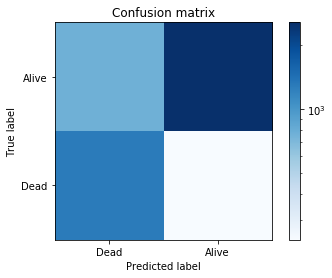

In [182]:
_ = plot_confusion_matrix(clfRF_confusion_matrix)

In [183]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.91      0.77      0.84      3341
        Dead       0.63      0.84      0.72      1529

    accuracy                           0.79      4870
   macro avg       0.77      0.81      0.78      4870
weighted avg       0.82      0.79      0.80      4870



Additionally, I am going to plot the precision-recall curve and to obtain the average precision score.

Average precision-recall score: 0.76


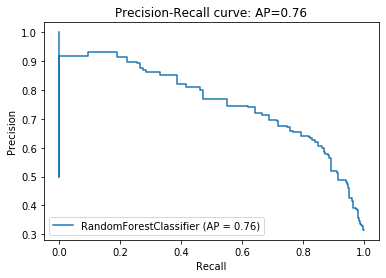

In [184]:
y_predicted_proba_clfRF = clfRF.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfRF[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfRF, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

# Light Gradient Boosting Machine

In [224]:
clfLGB = LGBMClassifier(class_weight='balanced', random_state=0, objective='binary')

In [225]:
clfLGB.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=0, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [226]:
cv = 3
recall_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring="f1").mean()
print(f'Recall: {recall_LGB:.1%}')
print(f'Precision: {precision_LGB:.1%}')
print(f'F1-score: {f1_LGB:.1%}')

Recall: 0.821
Precision: 0.618
F1-score: 0.705


In [165]:
LGB_grid = GridSearchCV(LGBMClassifier(class_weight='balanced', random_state=0, objective='binary', 
                                       n_estimators=800, learning_rate=0.01),
                       param_grid = {'num_leaves': np.arange(2,18,3),
                                     'min_data_in_leaf': np.arange(80,135,7),
                                     'max_depth': np.arange(2,10,2),
                                     'feature_fraction': [0.8,0.9],
                                     'min_child_weight': [1e-09,1e-08]
                                     },
                       cv = 5,
                       scoring = 'recall')

In [166]:
LGB_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt',
                                      class_weight='balanced',
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.01, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=800,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      si...
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'featur

In [167]:
print(f'Best recall: {LGB_grid.best_score_:.1%}') 
print(f'Best parameters: {LGB_grid.best_params_:}') 

Best recall: 0.833
Best parameters: {'feature_fraction': 0.9, 'max_depth': 4, 'min_child_weight': 1e-09, 'min_data_in_leaf': 122, 'num_leaves': 14}


In [170]:
LGB_grid = GridSearchCV(LGBMClassifier(class_weight='balanced', random_state=0, objective='binary', 
                                       n_estimators=800, learning_rate=0.01),
                       param_grid = {'num_leaves': np.arange(13,16),
                                     'min_data_in_leaf': np.arange(119,127),
                                     'max_depth': np.arange(3,7),
                                     'feature_fraction': [0.8,0.9],
                                     'min_child_weight': [1e-08,1e-09,1e-10]
                                     },
                       cv = 5,
                       scoring = 'recall')

In [171]:
LGB_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt',
                                      class_weight='balanced',
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.01, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=800,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      si...
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'featur

In [172]:
print(f'Best recall: {LGB_grid.best_score_:.1%}') 
print(f'Best parameters: {LGB_grid.best_params_:}') 

Best recall: 0.834
Best parameters: {'feature_fraction': 0.9, 'max_depth': 3, 'min_child_weight': 1e-08, 'min_data_in_leaf': 119, 'num_leaves': 13}


In [173]:
clfLGB = LGBMClassifier(class_weight='balanced', random_state=0, objective='binary', n_estimators=800, learning_rate=0.01,
                       max_depth=3, min_data_in_leaf=119, num_leaves=13, min_child_weight=1e-08, feature_fraction=0.9)

In [174]:
clfLGB.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.01, max_depth=3,
               min_child_samples=20, min_child_weight=1e-08,
               min_data_in_leaf=119, min_split_gain=0.0, n_estimators=800,
               n_jobs=-1, num_leaves=13, objective='binary', random_state=0,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [175]:
cv = 10
recall_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring='recall').mean()
precision_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring='precision').mean()
f1_LGB = cross_val_score(clfLGB, X_train, y_train, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_LGB:.1%}')
print(f'Precision: {precision_LGB:.1%}')
print(f'F1-score: {f1_LGB:.1%}')

Recall: 0.834
Precision: 0.608
F1-score: 0.703


Once the model is trained, I am going to evaluate it using the test data.

In [176]:
cv = 10
recall_LGB = cross_val_score(clfLGB, X_test, y_test, cv=cv, scoring='recall').mean()
precision_LGB = cross_val_score(clfLGB, X_test, y_test, cv=cv, scoring='precision').mean()
f1_LGB = cross_val_score(clfLGB, X_test, y_test, cv=cv, scoring='f1').mean()
print(f'Recall: {recall_LGB:.1%}')
print(f'Precision: {precision_LGB:.1%}')
print(f'F1-score: {f1_LGB:.1%}')

Recall: 0.836
Precision: 0.621
F1-score: 0.712


This light gradient boosting machine classifier has a recall of 83.6%, slightly better than the recall of 83.3% for the logistic regression classifier. I am also going to check the false positives and the false negatives, as well as plotting the confusion matrix.

In [180]:
y_predicted = clfLGB.predict(X_test)

In [181]:
clfLGB_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfLGB_confusion_matrix)

[[1303  226]
 [ 823 2518]]


In [182]:
true_positives, false_negatives, false_positives, true_negatives = clfLGB_confusion_matrix.ravel()
print(f'True positives: {true_positives:}')
print(f'True negatives: {true_negatives:}')
print(f'False positives: {false_positives:}')
print(f'False negatives: {false_negatives:}') 

True positives: 1303
True negatives: 2518
False positives: 823
False negatives: 226


In [183]:
def plot_confusion_matrix(clfLGB_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(clfLGB_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', 
                              norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

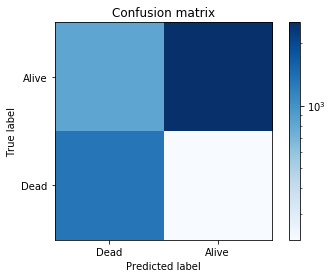

In [184]:
_ = plot_confusion_matrix(clfLGB_confusion_matrix)

In [185]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.92      0.75      0.83      3341
        Dead       0.61      0.85      0.71      1529

    accuracy                           0.78      4870
   macro avg       0.77      0.80      0.77      4870
weighted avg       0.82      0.78      0.79      4870



Additionally, I am going to plot the precision-recall curve and to obtain the average precision score.

Average precision-recall score: 0.76


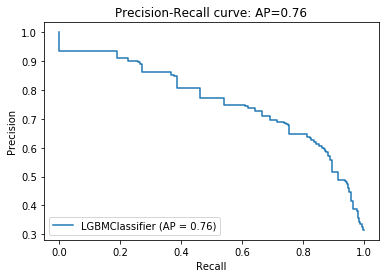

In [186]:
y_predicted_proba_clfLGB = clfLGB.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_predicted_proba_clfLGB[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clfLGB, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()